 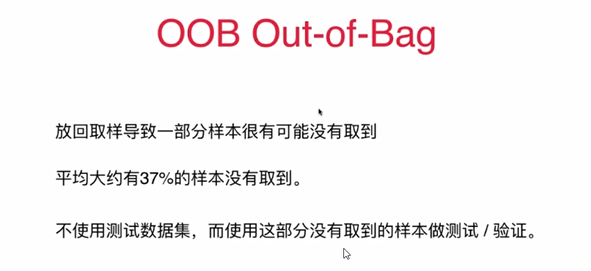

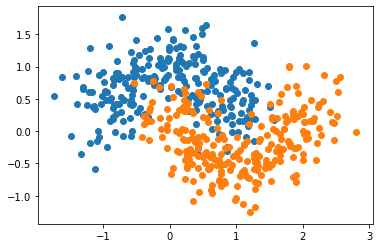

In [7]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 使用oob

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True,oob_score=True)

bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [9]:
 bagging_clf.oob_score_

0.916

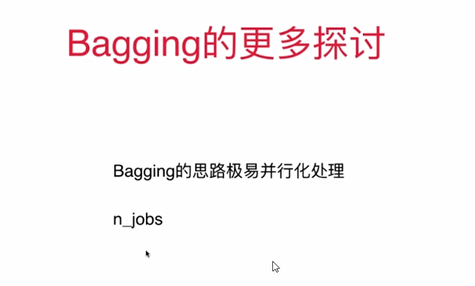

# n_jobs

In [10]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True,oob_score=True)

bagging_clf.fit(X, y)

Wall time: 440 ms


In [11]:
%%time
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True,oob_score=True,n_jobs=-1)

bagging_clf2.fit(X, y)

Wall time: 200 ms


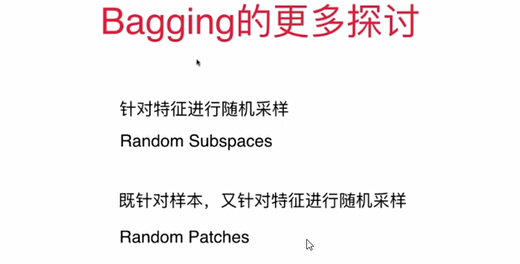

# 在特征空间上随机采样(Bootstrap_features)

In [12]:
# 对特征进行随机采样
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=500,
                               bootstrap=True,oob_score=True,n_jobs=-1,
                                max_features=1,bootstrap_features=True)

random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.824

In [13]:
# 对样本和特征都进行随机采样
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True,oob_score=True,n_jobs=-1,
                                max_features=1,bootstrap_features=True)

random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.856